In [1]:
from qiskit_ionq import IonQProvider, ionq_job
ionq_provider = IonQProvider("mycsEhnoIgARQdch53Zm7KJUePwFD0Wr")
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.tools.visualization import plot_histogram, array_to_latex
from qiskit.visualization import plot_state_city, plot_bloch_multivector
from qiskit.quantum_info import Statevector, DensityMatrix, Operator
from matplotlib import pyplot as plt
import numpy as np
import time

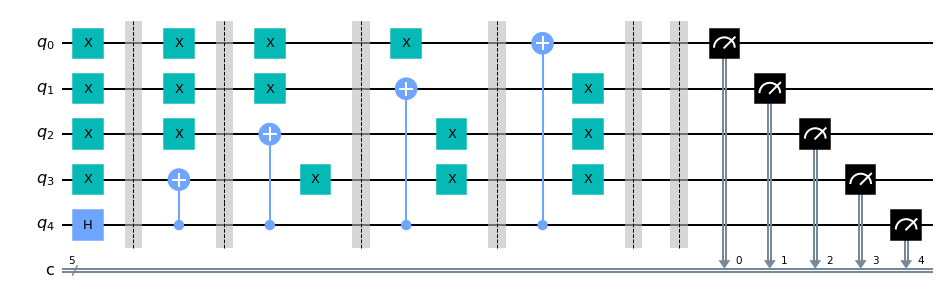

In [11]:
qr = QuantumRegister(5,'q')
cr = ClassicalRegister(5,'c')
qc = QuantumCircuit(qr,cr)

qc.h(4)
qc.x([0,1,2,3])
qc.barrier()
qc.cx(4,3)
qc.x([0,1,2])
qc.barrier()
qc.cx(4,2)
qc.x([0,1,3])
qc.barrier()
qc.cx(4,1)
qc.x([0,2,3])
qc.barrier()
qc.cx(4,0)
qc.x([1,2,3])
qc.barrier()
qc.measure_all(add_bits=False)
qc.draw(output='mpl')

In [12]:
sim_backend = ionq_provider.get_backend('ionq_simulator')

qpu_backend = ionq_provider.get_backend('ionq_qpu')

In [13]:
ID = []

In [14]:
for i in range(10):
    job = qpu_backend.run(qc,shots = 1024)
    ID.append(job.job_id())

In [16]:
f = open("C:/Users/cbk92/Desktop/VSC_code/IONQ/ID_time/ID_GHZ_X.txt",'w')

for i in range(10):
    f.write(ID[i])
    f.write('\n')

f.close()